# Earthquake Visualization Project

In [ ]:
from google.colab import files
import numpy as np
import io 
import pandas as pd
import matplotlib.pyplot as plt




In [ ]:
uploaded = files.upload()

Saving earthquakes.csv to earthquakes (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['earthquakes.csv']))

In [ ]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-05-21T18:04:13.537Z,34.6125,98.2458,10.00,7.30,mww,NaN,9.0,7.769,0.80,us,us7000e54r,2021-06-03T01:00:05.209Z,"Southern Qinghai, China",earthquake,7.5,1.7,0.037,71.0,reviewed,us,us
1,2021-03-20T09:09:43.966Z,38.4515,141.6477,43.00,7.00,mww,NaN,35.0,2.378,0.75,us,us7000dl6y,2021-06-02T15:24:07.040Z,"30 km E of Ishinomaki, Japan",earthquake,7.2,1.9,0.045,47.0,reviewed,us,us
2,2021-03-04T19:28:33.178Z,-29.7228,-177.2794,28.93,8.10,mww,NaN,21.0,0.739,0.69,us,us7000dflf,2021-05-13T22:45:32.040Z,"Kermadec Islands, New Zealand",earthquake,7.7,3.3,0.034,81.0,reviewed,us,us
3,2021-03-04T17:41:23.370Z,-29.6768,-177.8398,43.00,7.40,mww,NaN,30.0,0.437,1.09,us,us7000dfk3,2021-05-13T22:45:25.040Z,"Kermadec Islands, New Zealand",earthquake,7.8,1.9,0.049,40.0,reviewed,us,us
4,2021-03-04T13:27:34.647Z,-37.4787,179.4576,10.00,7.30,mww,NaN,24.0,0.918,0.68,us,us7000dffl,2021-05-13T22:43:37.040Z,"182 km NE of Gisborne, New Zealand",earthquake,5.7,1.6,0.045,47.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,1901-08-09T18:33:00.000Z,40.0000,144.0000,0.00,7.50,mw,NaN,NaN,NaN,NaN,iscgem,iscgem16957736,2020-07-09T21:51:20.368Z,"off the east coast of Honshu, Japan",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
1419,1901-08-09T13:01:00.000Z,-22.0000,170.0000,0.00,7.90,mw,NaN,NaN,NaN,NaN,iscgem,iscgem16957737,2020-07-09T21:51:40.428Z,southeast of the Loyalty Islands,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
1420,1900-10-29T09:11:00.000Z,11.0000,-66.0000,0.00,7.70,mw,NaN,NaN,NaN,NaN,iscgem,iscgem16957719,2020-07-09T21:50:47.628Z,"offshore Miranda, Venezuela",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
1421,1900-10-09T12:25:00.000Z,57.0900,-153.4800,NaN,7.86,mw,NaN,NaN,NaN,NaN,ushis,ushis391,2019-05-02T20:46:08.555Z,"Kodiak Island region, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,pt


Add in K means Clustering

In [ ]:
# Colors to plot data points with
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:pink", "tab:brown", "tab:grey", "tab:cyan"]

In [ ]:
# K means parameters
k = 7       # number of clusters
max_itr = 100 # max number of iterations

mag = df['mag'].tolist()

#list of lat or lon
latitude = df['latitude'].tolist()
longitude = df['longitude'].tolist()

# list of locations
dataS = [[latitude[i], longitude[i]] for i in range(0, len(latitude))] 

# random lon lat for centroids
randLon = np.random.uniform(low=-1.2, high=1.2, size=k)*max(longitude)
randLat = np.random.uniform(low=-1.2, high=1.2, size=k)*max(latitude)

#centroid
#centroidS = [[-50,-150], [50,150]]
centroidS = [[randLat[i], randLon[i]] for i in range(len(randLat))]

In [ ]:
centroidS

[[-34.13945084748069, 202.27203900197148],
 [-63.625162659917116, 13.535293108543858],
 [-32.10240288191295, 29.288129177470665],
 [-8.316469418909268, -148.95003622728956],
 [-14.998949197890958, 197.36167331957333],
 [58.103531199729886, -100.22936560759584],
 [17.51652263453172, -204.5026784763673]]

In [ ]:
def distanceS(pt1, pt2):
  return np.sqrt(np.square(pt1[0]-pt2[0]) + np.square(pt1[1]-pt2[1]))

def assignS(centroids, all_pts, mag):
  d = {}
  m = {}
  for index, i in enumerate(all_pts):
    ll = [0, centroids[0], distanceS(i, centroids[0])]
    for ind, x in enumerate(centroids):
      if ind not in d.keys():
        d[ind] = []
        m[ind] = []
      if distanceS(i, x) < ll[2]:
        ll = [ind, x, distanceS(i, x)]
    if ll[0] not in d.keys():
      d[ll[0]] = [i]
      m[ll[0]] = [mag[index]]
    else:
      d[ll[0]].append(i)
      m[ll[0]].append(mag[index])
  return d, m

def new_centroidS(region_pts, m):
  """
  Weighted
  """
  max_mag = max(m)
  lon = 0
  lat = 0
  length = len(region_pts)
  if length == 0:
    return [0, 0]
  else:
    for ind, i in enumerate(region_pts):
      lon += (m[ind]/max_mag) * i[0]
      lat += (m[ind]/max_mag) * i[1]
    return [lon/length, lat/length]

def new_centroidS2(region_pts, mag):
  """
  UnWeighted
  """
  lon = 0
  lat = 0
  length = len(region_pts)

  if length == 0:
    return [0, 0]
  else:
    for i in region_pts:
      lon += i[0]
      lat += i[1]
    return [lon/length, lat/length]
  



In [ ]:
def reasign(m2, centroidS, all_pts, mag):
  d, m = assignS(centroidS, all_pts, mag)
  d2 = []
  itr = 0
  print(d)
  d_values = list(d.values())
  m_values = list(m.values())
  while itr <= m2:
    d2 = []
    for y in range(len(d_values)):
      n = new_centroidS(d_values[y], m_values[y])
      d2.append(n)
    d, m = assignS(d2, all_pts, mag)
    itr += 1
  return d, d2, m

      

[7.3, 7.0, 8.1, 7.4, 7.3, 7.1, 7.7, 7.0, 7.0, 7.6, 7.8, 7.0, 7.4, 7.4, 7.5, 7.0, 7.7, 7.1, 7.2, 7.1, 7.3, 7.3, 8.0, 7.6, 7.1, 7.0, 7.5, 7.0, 7.3, 7.1, 7.5, 7.1, 7.0, 7.5, 7.9, 7.1, 7.1, 7.3, 8.2, 7.5, 7.2, 7.9, 7.1, 7.5, 7.0, 7.3, 7.1, 8.2, 7.7, 7.9, 7.3, 7.6, 7.9, 7.8, 7.8, 7.0, 7.1, 7.4, 7.2, 7.7, 7.2, 7.0, 7.8, 7.0, 7.8, 7.2, 7.1, 7.2, 7.1, 7.6, 7.6, 7.5, 7.1, 7.0, 8.3, 7.0, 7.0, 7.0, 7.8, 7.3, 7.1, 7.5, 7.8, 7.5, 7.0, 7.1, 7.1, 7.1, 7.3, 7.0, 7.9, 7.5, 7.2, 7.4, 7.6, 7.1, 7.7, 8.2, 7.0, 7.7, 7.1, 7.1, 7.1, 7.7, 7.0, 7.3, 7.3, 8.3, 7.4, 7.2, 7.7, 7.0, 7.1, 7.0, 7.1, 8.0, 7.5, 7.1, 7.3, 7.4, 7.8, 7.3, 7.6, 7.6, 7.3, 7.7, 7.0, 8.2, 8.6, 7.1, 7.4, 7.1, 7.2, 7.1, 7.1, 7.4, 7.3, 7.0, 7.0, 7.1, 7.2, 7.0, 7.6, 7.3, 7.1, 7.7, 7.9, 9.1, 7.3, 7.2, 7.0, 7.2, 7.0, 7.3, 7.4, 7.8, 7.0, 7.0, 7.1, 7.3, 7.0, 7.5, 7.6, 7.3, 7.3, 7.0, 7.5, 7.2, 7.2, 7.8, 7.2, 7.0, 7.4, 8.8, 7.0, 7.0, 7.1, 7.3, 7.4, 7.8, 7.7, 7.6, 8.1, 7.0, 7.5, 7.1, 7.8, 7.3, 7.6, 7.0, 7.2, 7.4, 7.4, 7.7, 7.3, 7.4, 7.0, 7.0, 7.7, 7.0,

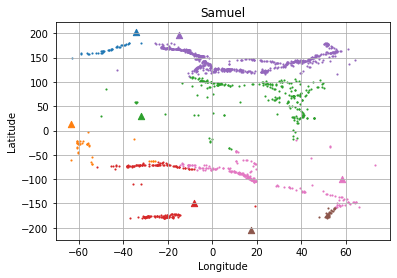

In [ ]:
fig, (ax2) = plt.subplots(1, 1)

ax2.set_title('Samuel')
ax2.set_ylabel("Latitude")
ax2.set_xlabel("Longitude")

print(mag)
d,m = assignS(centroidS, dataS, mag)
print(d.values())
print(m.keys())
v = d.values()
for ind, i in d.items():
  ax2.scatter(centroidS[ind][0], centroidS[ind][1], marker="^", s=40, color=colors[ind])
  for x in i:
    ax2.scatter(x[0], x[1], marker=".", s=5, color=colors[ind])

ax2.grid('on')
plt.show()

{0: [[-37.4787, 179.4576], [-42.7373, 173.054], [-37.3586, 179.1461], [-43.522, 171.83], [-45.762, 166.562], [-55.663999999999994, 158.453], [-49.271, 164.115], [-49.312, 161.345], [-46.676, 164.72099999999998], [-45.104, 167.144], [-62.876999999999995, 149.52700000000002], [-32.115, 179.791], [-37.759, 178.752], [-45.277, 166.92700000000002], [-52.341, 160.56799999999998], [-58.893, 158.513], [-51.225, 160.513], [-48.786, 164.357], [-46.675, 165.707], [-59.232, 158.90200000000002], [-41.659, 172.02], [-49.736000000000004, 164.00900000000001], [-56.04600000000001, 157.922], [-48.968999999999994, 164.285], [-50.075, 162.851], [-38.951, 177.562], [-46.93899999999999, 166.02200000000002], [-53.983000000000004, 158.737], [-41.18600000000001, 175.868], [-45.736999999999995, 167.21400000000003], [-40.497, 175.171], [-39.482, 176.21599999999998], [-39.659, 176.42], [-41.982, 172.39700000000002], [-42.968, 172.03], [-50.181999999999995, 159.597], [-49.522, 158.911], [-56.198, 158.563]], 1: [[-

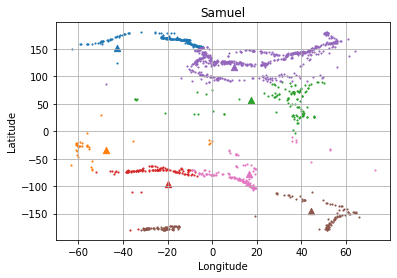

In [ ]:
fig, (ax2) = plt.subplots(1, 1)

ax2.set_title('Samuel')
ax2.set_ylabel("Latitude")
ax2.set_xlabel("Longitude")

#d = assignS(centroidS, dataS, mag)

d,c,m = reasign(max_itr, centroidS, dataS, mag)
print(d)
for ind, i in d.items():
  print(c[ind])
  ax2.scatter(c[ind][0], c[ind][1], marker="^", s=40, color=colors[ind])
  for x in i:
    ax2.scatter(x[0], x[1], marker=".", s=5, color=colors[ind])

ax2.grid('on')
plt.show()


In [ ]:
"""
Make dataframe
"""

def data_frame(centroids, mag):
  d = {}
  d["latitude"] = []
  d["longitude"] = []
  d["m"] = []
  d["num"] = []
  for ind, i in enumerate(centroids):
    d["latitude"].append(i[1])
    d["longitude"].append(i[0])
    d["m"].append(sum(mag[ind])/len(mag[ind]))
    d["num"].append(len(mag[ind]))
  return d


In [ ]:
print(c)
print(len(c))
print(len(m))
print(m)
dictionary = data_frame(c,m)
df_new = pd.DataFrame(dictionary)
df_new
df_new.to_csv('7centroids.csv')
files.download('7centroids.csv')

[[-42.456237394411964, 150.70435588044188], [-47.56751527336862, -33.32331721340388], [17.47133809364549, 57.14176483038702], [-19.906569319929034, -95.45546031933773], [9.744267050309809, 117.27230846642588], [16.551216191789784, -77.43950319202725], [44.245707513416825, -146.04845462134767]]
7
7
{0: [7.3, 7.7, 7.0, 7.5, 7.0, 7.9, 7.1, 7.0, 7.9, 7.9, 7.8, 7.8, 7.0, 7.2, 7.0, 7.1, 7.0, 7.1, 7.5, 7.5, 7.5, 7.4, 7.6, 7.1, 7.3, 7.1, 7.0, 7.1, 8.0, 7.1, 7.0, 7.1, 7.2, 7.0, 7.3, 7.0, 7.3, 7.0, 7.3, 7.2, 7.1, 7.3, 7.4, 7.8, 7.7, 7.8, 7.1, 7.3, 7.4, 7.2, 7.2, 8.1, 7.1, 7.6, 8.1, 7.1, 7.1, 7.3, 7.2, 7.3, 7.7, 7.2, 7.1, 7.1, 7.8, 7.8, 7.0, 7.0, 7.1, 7.5, 7.1, 7.3, 7.0, 7.0, 8.1, 7.5, 7.0, 7.1, 7.7, 7.2, 7.2, 7.7, 7.7, 7.1, 7.2, 7.0, 7.0, 7.0, 7.1, 7.4, 7.0, 7.2, 7.1, 7.2, 7.1, 7.6, 8.02, 7.6, 7.0, 7.0, 7.4, 7.1, 7.1, 7.1, 7.0, 7.0, 7.3, 7.2, 7.1, 7.6, 7.6, 7.0, 7.0, 7.0, 7.0, 7.6, 7.2, 7.9, 7.5, 7.1, 7.4, 7.1, 7.2, 7.5, 7.5, 7.5, 7.0, 7.7, 7.9, 7.2, 7.1, 7.0, 7.2, 7.2, 7.5, 7.0, 7.5, 7.2, 7.2, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>